# Curve Extraction

The goal is to extract numerical values from an image. 

### 1. Image import and Preprocessing

In [1]:
import skimage.io as skio
import numpy as np

In [61]:
figure1 = skio.imread('Figure4.png')

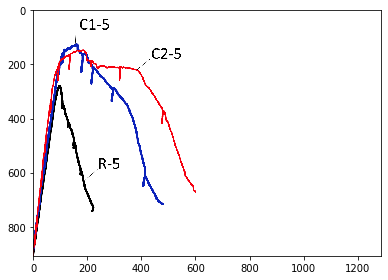

In [66]:
skio.imshow(figure1)

In [63]:
figure1 = np.delete(figure1, 3,2)

In [64]:
# Make legend as a part of background
figure1[:, 800:,:] = [255,255,255]

In [65]:
h, w, _ = figure1.shape

### 2. Extract and rescale the coordinates

In [25]:
# Extract coordinate of a certain color from the original graph
# Using vectorization
# Note: the pixel pairs is (h,w)/(y,x)

def extract_cord(h, w, img, color, delta):
    low = color - delta
    high = color + delta
    
    h_coord, w_coord =  np.where((img[:,:,0] < high[0]) & (img[:,:,0] > low[0]) & \
                    (img[:,:,1] < high[1]) & (img[:,:,1] > low[1]) & \
                    (img[:,:,2] < high[2]) & (img[:,:,2] > low[2]) )
    print(h_coord,w_coord)
    coords = np.zeros((len(h_coord),2))
    coords[:,0] = h - h_coord
    coords[:,1] = w_coord
    print(coords)
    return coords
    
    '''
    The following is an unvectorized implementation:
    
    for i in range(h):
        for j in range(w):
            pix = img[i][j]
            exit = False
            for k in range(3):
                if pix[k] > high[k] or pix[k] < low[k]:
                    exit = True
            if exit == True:
                pass
            else:
                cords.append([i,j]) 
    return cords
    '''

In [21]:
# change the coordinate 
def change_cords(h,w, x,y, coords):
    coords = np.array(coords)
    coords [:,0] = coords [:,0] * x/h
    coords [:,1] = coords [:,1] * y/w
    return coords

In [9]:
# Turn the coordinates into (x,y) sequence
# Average out y_s if they have the same x value
def average_coords(coords, decimal):
    coords[:,1] = np.around(coords,decimals =2)[:,1]
    x_val = list(set(coords[:,1]))
    return_val = np.zeros((len(x_val),2))
    return_val[:,0] = x_val
    for i in range(len(x_val)):
        val = coords[coords[:,1] == x_val[i]][:,0].mean()
        #print(val)
        return_val[i,1] = val
    return return_val

    

In [10]:
def main(color, figure, delta):
    curve_coords = extract_cord(h, w, figure, color, delta)
    coords = change_cords(h,w, 160,150, curve_coords)
    final = average_coords(coords, 2)
    return final

In [71]:
blue2 = main(np.array([0,0,255]), figure1, 80)

[123 123 123 ... 905 906 907] [159 160 161 ...   3   3   3]
[[785. 159.]
 [785. 160.]
 [785. 161.]
 ...
 [  3.   3.]
 [  2.   3.]
 [  1.   3.]]
[[138.32599119  18.51708075]
 [138.32599119  18.63354037]
 [138.32599119  18.75      ]
 ...
 [  0.52863436   0.34937888]
 [  0.35242291   0.34937888]
 [  0.17621145   0.34937888]]


### 3. Visualization

In [17]:
import matplotlib.pyplot as plt

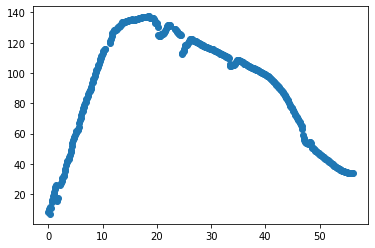

In [72]:
plt.scatter(blue2[:,0],blue2[:,1])

### 4. Export to excel

In [31]:
import pandas as pd

In [32]:
def export (coords, filepath):
    df = pd.DataFrame (coords)
    df.to_excel(filepath, index=False)

In [73]:
filepath = 'figure4_blue.xlsx'
export(blue2, filepath)